In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
target_col = 'HeartDisease'

numeric_col = ['Age','RestingBP', 'Cholesterol', 'FastingBS','MaxHR', 'Oldpeak']
categorical_col = ['Sex','ChestPainType','RestingECG','ExerciseAngina', 'ST_Slope']

In [14]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [16]:
df[numeric_col].agg(['min','max','mean','median']).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [17]:
for c in categorical_col:
    print(c, df[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


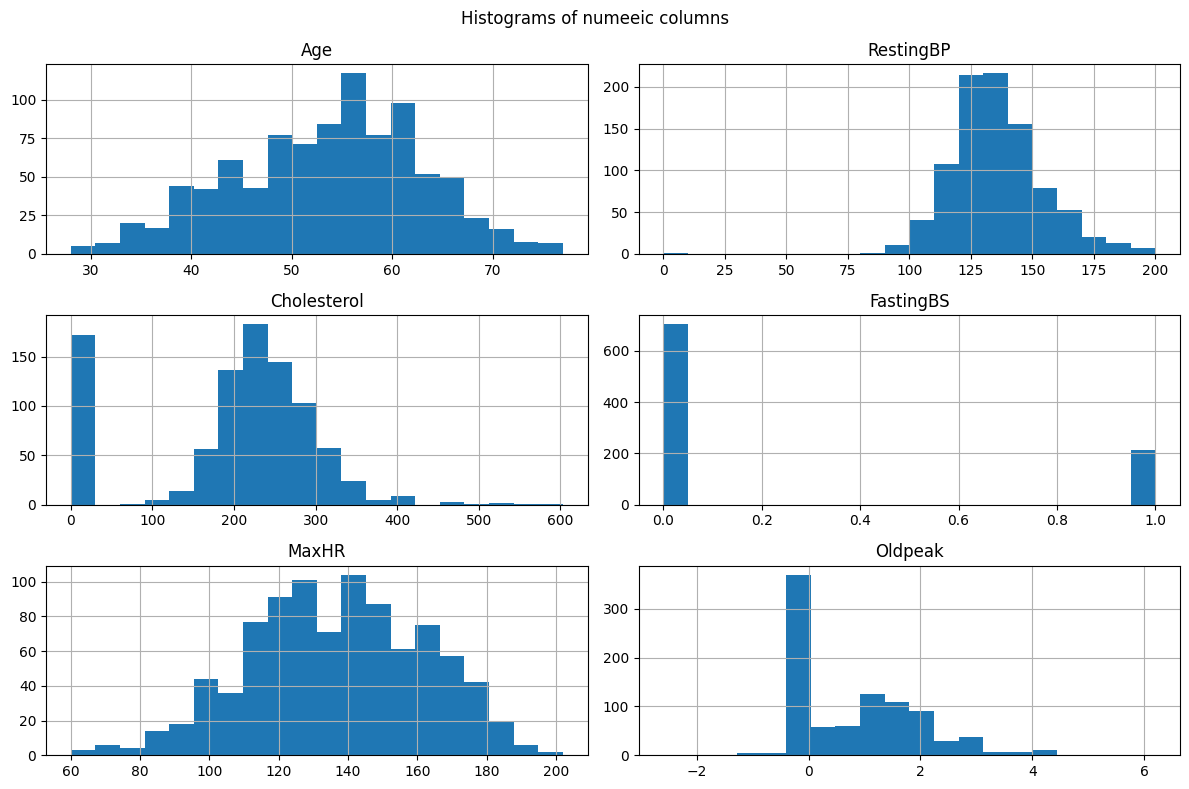

In [19]:
df[numeric_col].hist(bins=20, figsize=(12,8))
plt.suptitle('Histograms of numeeic columns')
plt.tight_layout()
plt.show()

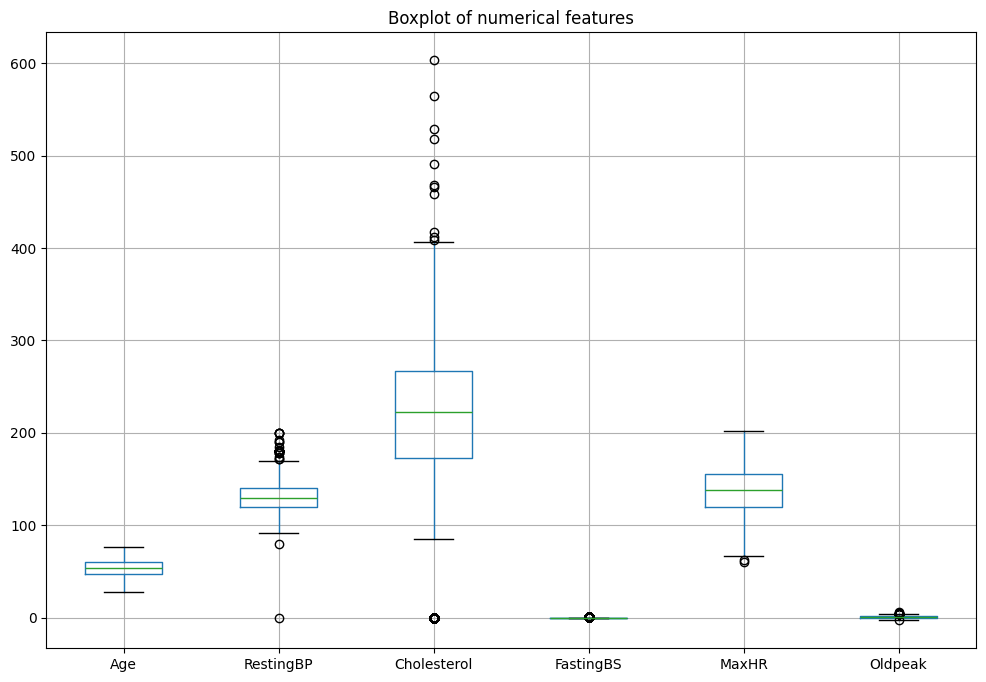

In [20]:
plt.figure(figsize=(12,8))
df[numeric_col].boxplot()
plt.title('Boxplot of numerical features')
plt.show()

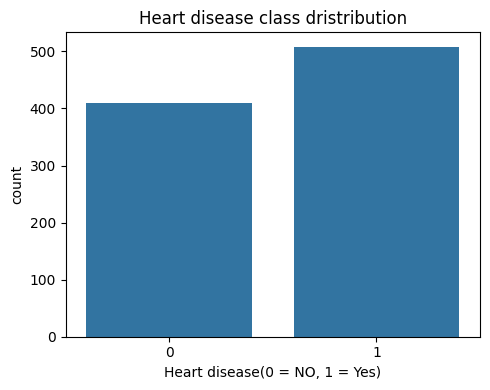

In [22]:
plt.figure(figsize=(5,4))
sns.countplot(x=df[target_col])
plt.title('Heart disease class dristribution')
plt.xlabel('Heart disease(0 = NO, 1 = Yes)')
plt.tight_layout()
plt.show()

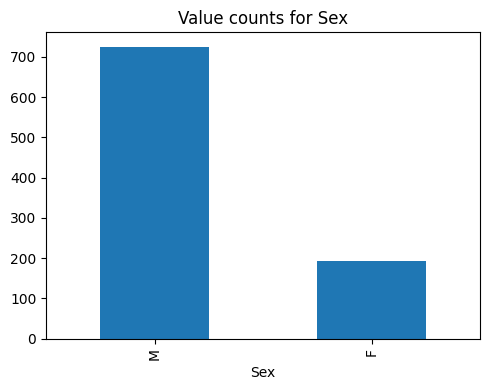

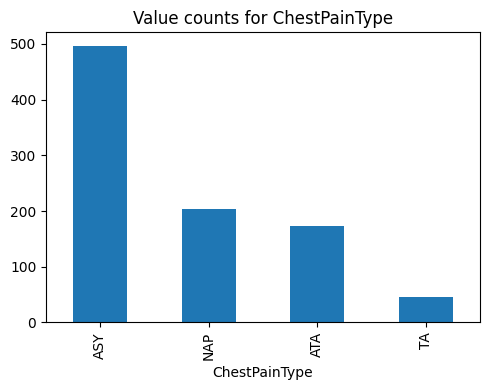

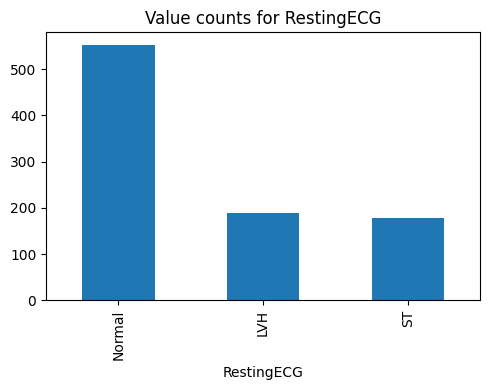

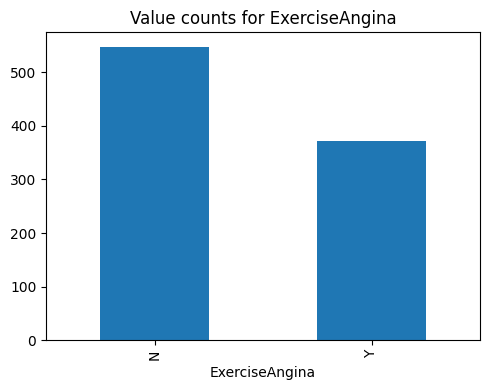

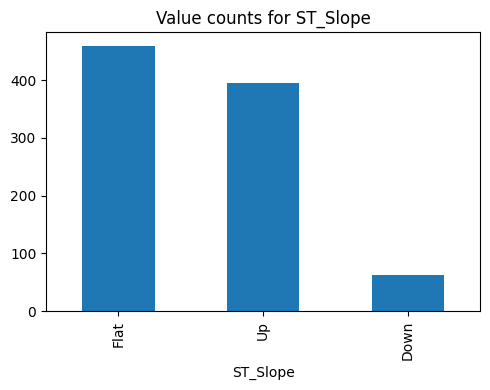

In [23]:
for c in categorical_col:
    plt.figure(figsize=(5,4))
    df[c].value_counts().plot(kind='bar')
    plt.title(f'Value counts for {c}')
    plt.tight_layout()
    plt.show()

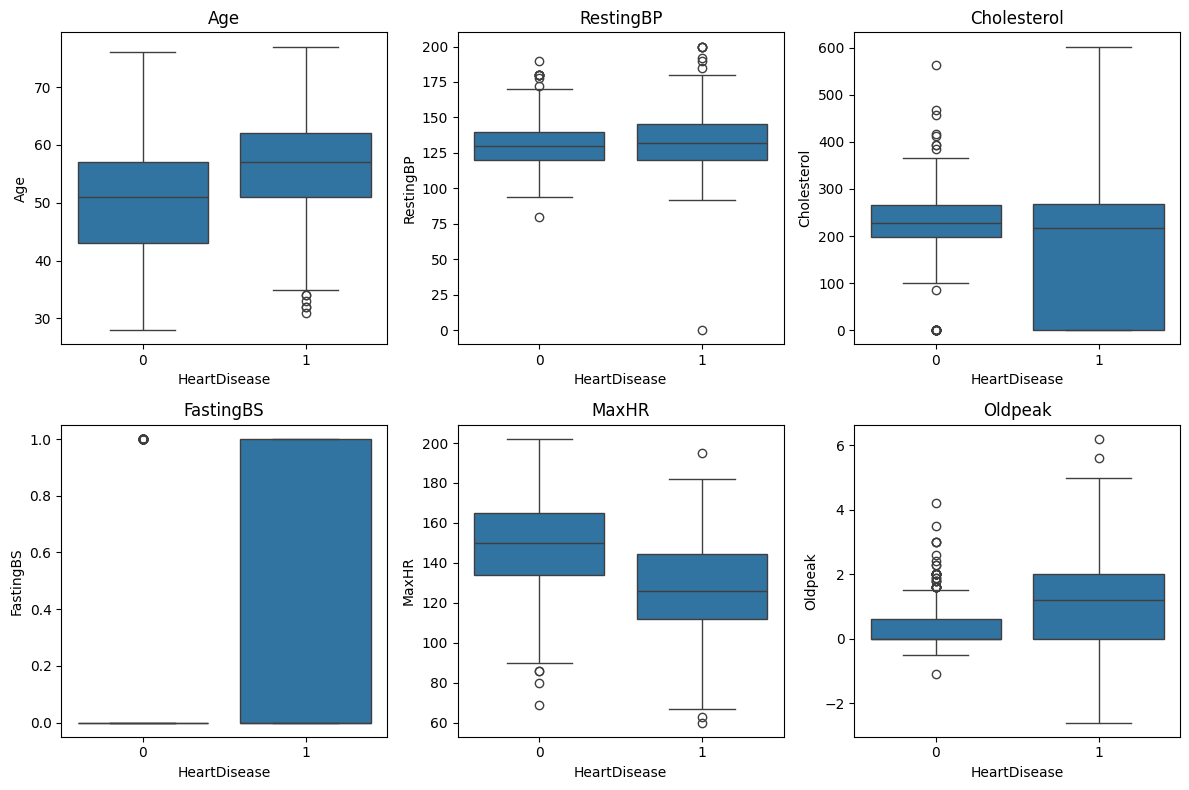

In [24]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_col,1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[target_col],y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [2]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

In [4]:
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
X = df3[['hours']]
y = df3['passed']
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X,y)


DecisionTreeClassifier(max_depth=2, random_state=42)

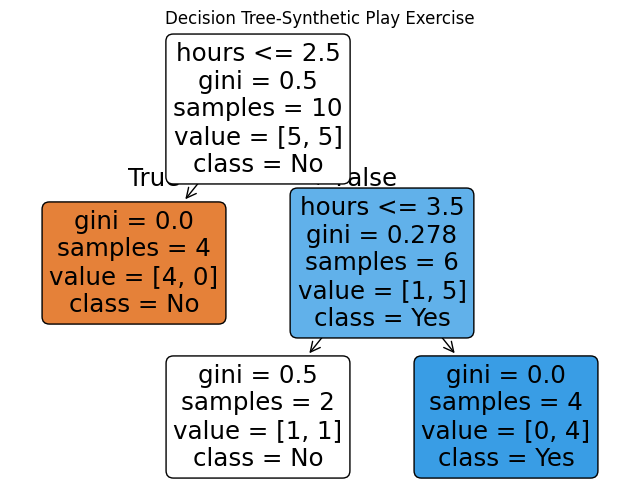

In [5]:
plt.figure(figsize=(8,6))
plot_tree(
    model,
    feature_names=['hours'],
    class_names = ['No', 'Yes'],
    filled = True,
    rounded = True,
)
plt.title("Decision Tree-Synthetic Play Exercise")
plt.show()

Missing values summary: 
 age             2
region          0
purchases       1
premium_user    0
dtype: int64
Number of unique value: 
 age             5
region          4
purchases       6
premium_user    2
dtype: int64
Correlation: 
                    age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000


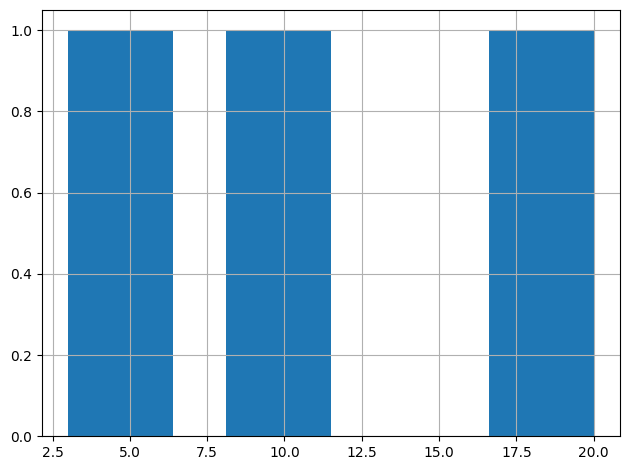

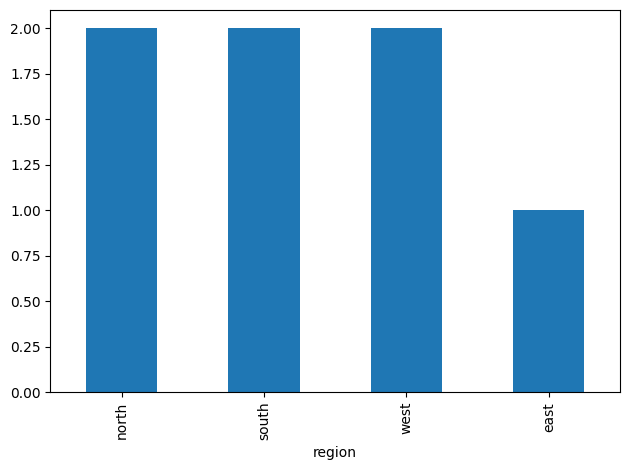

In [1]:
# Step 1: Create the dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})


print('Missing values summary: \n',df.isnull().sum())
print('Number of unique value: \n',df.nunique())
print('Correlation: \n', df[['age','purchases','premium_user']].corr())

df['purchases'].hist()

plt.tight_layout()
plt.show()
df['region'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()


Preprocess the dataset using sklearn plus pandas (9 marks)

Impute age with median.
Impute purchases with mean.
One hot encode region.
Scale all numeric columns using RobustScaler.
Create one domain driven feature (3 marks)

Example ideas: high_spender based on purchases, or age_group bins, or an interaction like age * purchases.
Show the final transformed dataframe ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.

In [ ]:
si_meadian = SimpleImputer(strategy='median')
si_mean = SimpleImputer(strategy='mean')
scaler = RobustScaler()
df['age'] = si_meadian.fit_transform(df[['age']])
df['purchases'] = si_mean.fit_transform(df[['purchases']])
df_encoded = pd.get_dummies(df, columns=['region'],dtype=int)

num_col = ['age','purchases']
df_encoded[num_col] = scaler.fit_transform(df_encoded[num_col])


df_encoded
df['age_group'] = pd.cut(
    df['age'],
    bins=[0,25,40,100],
    labels=['Young','Adult','Old']
)
df
df_encoded



,age,purchases,premium_user,age_group,region_east,region_north,region_south,region_west
0,-0.5,-0.943820,0,Young,0,1,0,0
1,0.0,0.000000,1,Adult,0,0,1,0
2,0.0,-0.674157,0,Adult,0,1,0,0
3,-0.8,0.112360,0,Young,1,0,0,0
4,1.5,1.348315,1,Old,0,0,0,1
5,2.2,1.078652,1,Old,0,0,0,1
6,0.0,-0.134831,0,Adult,0,0,1,0


In [42]:
df.columns

Index(['age', 'region', 'purchases', 'premium_user'], dtype='object')

Tasks (20 marks total):

Create the dataframe df2. (1 mark)

Split the data into train and test with 80 percent train and 20 percent test. (3 marks)

Fit a LinearRegression model to predict price from area_sqft and bedrooms. (4 marks)

Print model intercept, coefficients, and predictions on the test set. (4 marks)

Compute the following metrics on the test set. (6 marks)

Mean Absolute Error (MAE)

Root Mean Squared Error (RMSE)

R squared (R²)

Plot a residual plot with y_true − y_pred on the vertical axis and y_pred on the horizontal axis. (2 marks)

Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.

In [24]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


In [40]:
X = df2.drop(columns='price')
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predicted_data = [[2200, 5]]
predicted_price = model.predict(predicted_data)
print('Predicted price:',predicted_price[0])
y_pred = model.predict(X_test)
print('Intercept: ',model.intercept_)
print('coefficients: ',model.coef_[0])
print('predictions: ',y_pred)

Predicted price: 331.5384615384615
Intercept:  -33.8461538461537
coefficients:  0.15384615384615377
predictions:  [100.         130.76923077]


c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mae: ',mae)
print('Rmse: ',rmse)
print('r2 score: ',r2)


Mae:  19.615384615384542
Rmse:  19.619154992087385
r2 score:  -0.710716633793544


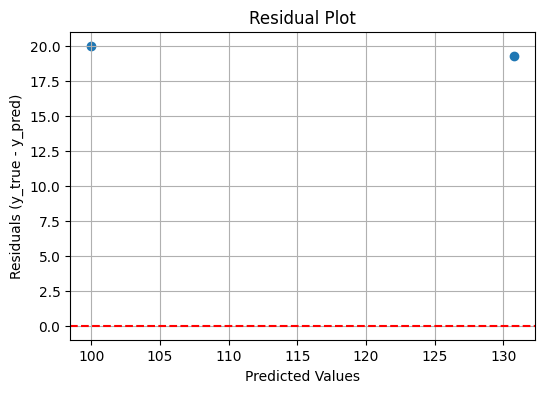

In [42]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (y_true - y_pred)')
plt.title('Residual Plot')
plt.show()

In [46]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

thresold = .5

y_pred = (y_prob>thresold).astype(int)
y_pred

cm = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1_Score = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_Score)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [49]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

thresold = .3

y_pred = (y_prob>thresold).astype(int)
y_pred

cm = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1_Score = f1_score(y_true, y_pred)
print('cm :\n', cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_Score)

cm :
 [[4 1]
 [0 5]]
Precision: 0.8333333333333334
Recall: 1.0
F1 Score: 0.9090909090909091


AUC:  0.9


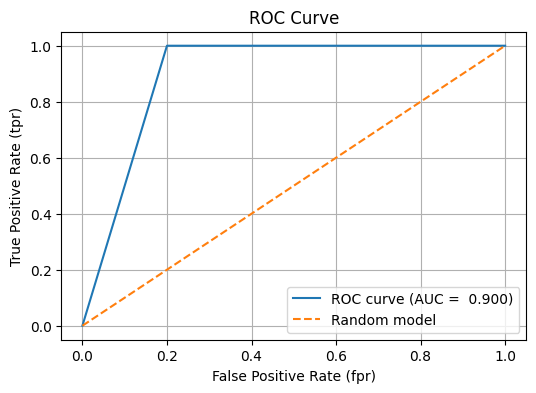

In [51]:
fpr,tpr,thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr,tpr)
print('AUC: ',round(roc_auc, 3))

#Plot
plt.figure()
plt.plot(fpr,tpr, label=f'ROC curve (AUC = {roc_auc: .3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random model')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("ROC Curve")
plt.legend()
plt.show()

Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]

Compute the median and IQR. Show your working clearly.

Use the IQR rule to check if 500 is an outlier. Show your steps and the fences.

Explain in 3 to 5 sentences why median + IQR may be better than mean + standard deviation for this dataset.

Write your full answer in the cell below.

In [ ]:
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
print(np.median(data_q1))
Q1 = np.quantile(data_q1, .25)
Q3 = np.quantile(data_q1, .75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
print(IQR)

lower = Q1 - IQR*1.5
upper = Q3 + IQR*1.5
upper


33.0
32.0
34.0
2.0


np.float64(37.0)